# Prédiction du prix d'un bien immobilier - Regression linéaire

Pour ce projet, nous avons utilisé une base de données contenant le prix de 1461 biens immobiliers, ainsi que 40 variables explicatives. Après avoir prétraité la base de données, nous avons utiliser le module Scikit-learn pour effectuer des regressions linéaires.

## Prise en main de la base de données


In [21]:
import pandas as pd
import os

path = "D:/travail/Ensae/python datascientist/DataBase/HousingDatabase.csv"

df = pd.read_csv(path, header=None)
df.drop(0, axis=1, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
0,Id,MSZoning,LotArea,Street,Alley,LotShape,Utilities,LandSlope,Neighborhood,BldgType,...,GarageCars,GarageArea,GarageQual,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SalePrice
1,1,RL,8450,Pave,NaN,Reg,AllPub,Gtl,CollgCr,1Fam,...,2,548,TA,0,0,NaN,NaN,NaN,2008,208500
2,2,RL,9600,Pave,NaN,Reg,AllPub,Gtl,Veenker,1Fam,...,2,460,TA,298,0,NaN,NaN,NaN,2007,181500
3,3,RL,11250,Pave,NaN,IR1,AllPub,Gtl,CollgCr,1Fam,...,2,608,TA,0,0,NaN,NaN,NaN,2008,223500
4,4,RL,9550,Pave,NaN,IR1,AllPub,Gtl,Crawfor,1Fam,...,3,642,TA,0,0,NaN,NaN,NaN,2006,140000


## Prétraitement de la base de données
### Renommer les colonnes

In [ ]:
column_name = list(df.ix[0])
df.drop([0], inplace = True)
df.columns = column_name

df.drop(["Id"], axis=1, inplace = True)

### Supprimer les colonnes avec peu d'information
On supprime ici toutes les colonnes avec moins de 85% de leur information

In [23]:
Low_info = []
for column in list(df.columns):
    isna = df[column].isna().sum()/df.shape[0]
    print("{} : ".format(column), isna)

    if isna > 0.15:
        df.drop([column], axis=1, inplace = True)
        Low_info.append(column)

print("Dropping : ", Low_info)

MSZoning :  0.0
LotArea :  0.0
Street :  0.0
Alley :  0.9376712328767123
LotShape :  0.0
Utilities :  0.0
LandSlope :  0.0
Neighborhood :  0.0
BldgType :  0.0
YearBuilt :  0.0
RoofStyle :  0.0
Foundation :  0.0
BsmtQual :  0.025342465753424658
TotalBsmtSF :  0.0
HeatingQC :  0.0
CentralAir :  0.0
1stFlrSF :  0.0
2ndFlrSF :  0.0
GrLivArea :  0.0
BsmtFullBath :  0.0
BsmtHalfBath :  0.0
FullBath :  0.0
HalfBath :  0.0
BedroomAbvGr :  0.0
KitchenAbvGr :  0.0
KitchenQual :  0.0
TotRmsAbvGrd :  0.0
Fireplaces :  0.0
FireplaceQu :  0.4726027397260274
GarageType :  0.05547945205479452
GarageCars :  0.0
GarageArea :  0.0
GarageQual :  0.05547945205479452
WoodDeckSF :  0.0
PoolArea :  0.0
PoolQC :  0.9952054794520548
Fence :  0.8075342465753425
MiscFeature :  0.963013698630137
YrSold :  0.0
SalePrice :  0.0
Dropping :  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### Correction des formats des variables

In [24]:
ListIntFormat = ["LotArea", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "PoolArea", "YrSold", "SalePrice"]
df[ListIntFormat] = df[ListIntFormat].astype("int")
print(df.dtypes)

MSZoning        object
LotArea          int32
Street          object
LotShape        object
Utilities       object
LandSlope       object
Neighborhood    object
BldgType        object
YearBuilt        int32
RoofStyle       object
Foundation      object
BsmtQual        object
TotalBsmtSF      int32
HeatingQC       object
CentralAir      object
1stFlrSF         int32
2ndFlrSF         int32
GrLivArea        int32
BsmtFullBath     int32
BsmtHalfBath     int32
FullBath         int32
HalfBath         int32
BedroomAbvGr     int32
KitchenAbvGr     int32
KitchenQual     object
TotRmsAbvGrd     int32
Fireplaces       int32
GarageType      object
GarageCars       int32
GarageArea       int32
GarageQual      object
WoodDeckSF       int32
PoolArea         int32
YrSold           int32
SalePrice        int32
dtype: object


### Exploration des variables qualitatives

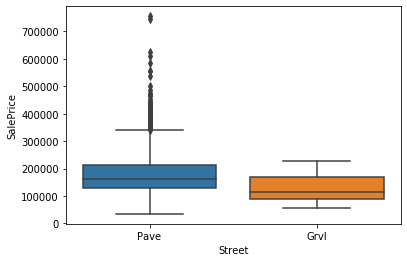

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.boxplot(x="Street", y="SalePrice", data=df)
plt.show()

In [26]:
df.drop(["Street"], axis=1, inplace=True)

In [ ]:
sns.boxplot(x="Utilities", y="SalePrice", data=df)
plt.show()
df.drop(["Utilities"], axis=1, inplace=True)


sns.boxplot(x="LandSlope", y="SalePrice", data=df)
plt.show()
df.drop(["LandSlope"], axis=1, inplace=True)

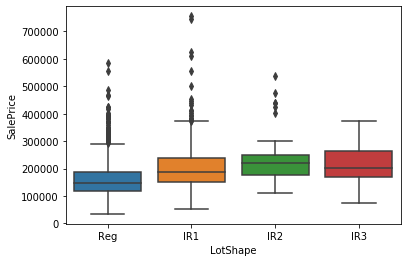

In [28]:
sns.boxplot(x="LotShape", y="SalePrice", data=df)
plt.show()

On va utiliser un test ANOVA pour déterminer l'utilité de cette donnée :

In [29]:
grouped_test=df[['LotShape', 'SalePrice']].groupby(['LotShape'])
f_val, p_val = stats.f_oneway(grouped_test.get_group("Reg")['SalePrice'], grouped_test.get_group("IR1")['SalePrice'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 94.98965962960983 , P = 9.171976277507338e-22


In [30]:
grouped_test=df[['LotShape', 'SalePrice']].groupby(['LotShape'])
f_val, p_val = stats.f_oneway(grouped_test.get_group("IR1")['SalePrice'], grouped_test.get_group("IR2")['SalePrice'], grouped_test.get_group("IR3")['SalePrice'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2.880967024052979 , P = 0.05695593858266565


En observant F, on conclut qu'il serait judiscieux de regrouper les catégories IR1, IR2 et IR3 en une catégorie IR, tout en conservant la séparation Reg et IR.

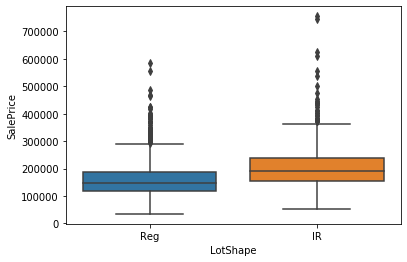

In [31]:
df["LotShape"] = df["LotShape"].map(lambda x: dict(Reg="Reg", IR1="IR", IR2="IR", IR3="IR")[x], df.LotShape.values.tolist())
sns.boxplot(x="LotShape", y="SalePrice", data=df)
plt.show()

In [ ]:
sns.boxplot(x="BldgType", y="SalePrice", data=df)
plt.show()
df.drop(["BldgType"], axis=1, inplace=True)


sns.boxplot(x="RoofStyle", y="SalePrice", data=df)
plt.show()
df.drop(["RoofStyle"], axis=1, inplace=True)

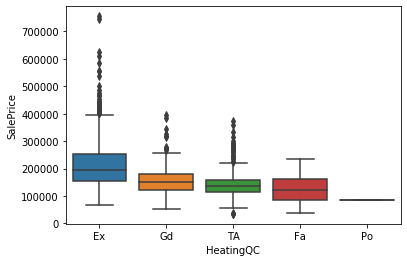

In [33]:
sns.boxplot(x="HeatingQC", y="SalePrice", data=df)
plt.show()

Test ANOVA : 

In [34]:
grouped_test=df[['HeatingQC', 'SalePrice']].groupby(['HeatingQC'])
f_val, p_val = stats.f_oneway(grouped_test.get_group("Ex")['SalePrice'], grouped_test.get_group("TA")['SalePrice'], grouped_test.get_group("Gd")['SalePrice'], grouped_test.get_group("Fa")['SalePrice'], grouped_test.get_group("Po")['SalePrice'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 88.39446198869798 , P = 2.667062092104357e-67


Test sans la catégorie Ex : 

In [35]:
grouped_test=df[['HeatingQC', 'SalePrice']].groupby(['HeatingQC'])
f_val, p_val = stats.f_oneway( grouped_test.get_group("TA")['SalePrice'], grouped_test.get_group("Gd")['SalePrice'], grouped_test.get_group("Fa")['SalePrice'], grouped_test.get_group("Po")['SalePrice'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.386606759145167 , P = 1.746112836700238e-05


On peut simplifier la variable en deux catégorie, à savoir Ex et Others :

In [ ]:
df["HeatingQC"] = df["HeatingQC"].map(lambda x: dict(Ex="Ex", TA="other", Fa="other", Gd="other", Po="other")[x], df.HeatingQC.values.tolist())

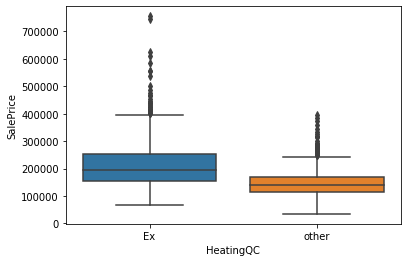

In [38]:
sns.boxplot(x="HeatingQC", y="SalePrice", data=df)
plt.show()

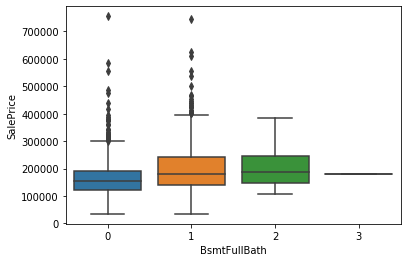

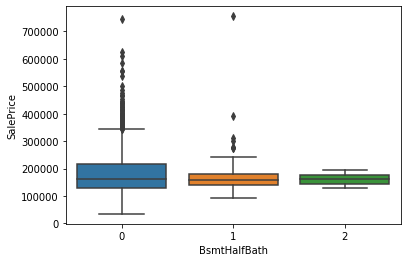

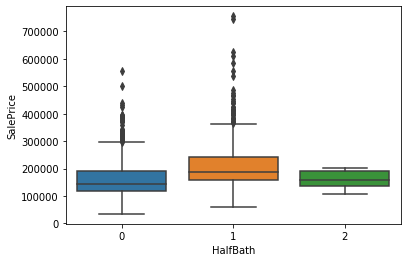

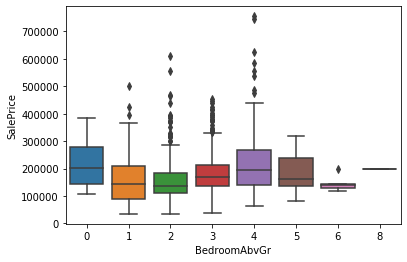

ANOVA results: F= 44.377948840285 , P = 2.1118039044755408e-19


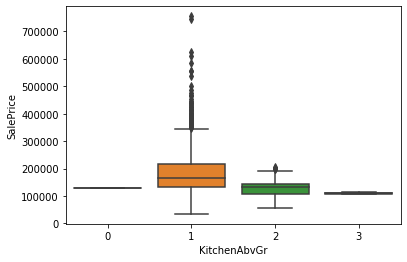

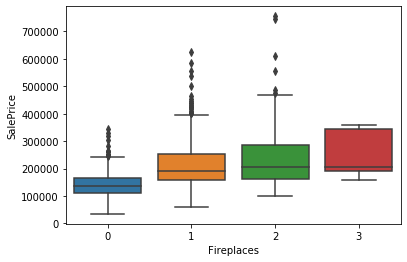

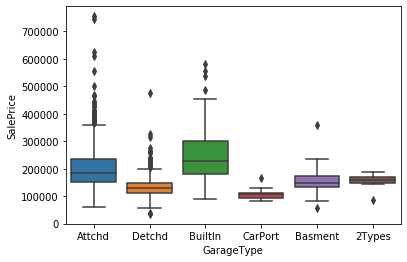

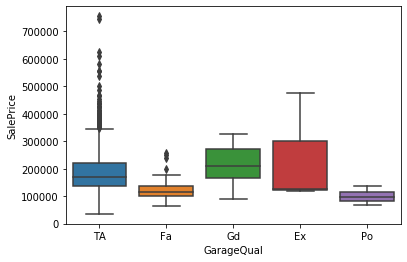

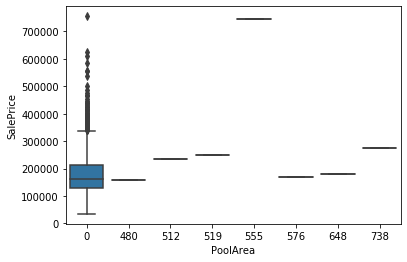

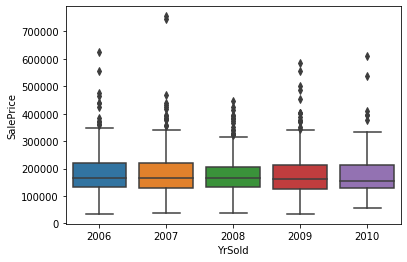

ANOVA results: F= 0.6455252211679311 , P = 0.6300887663573457


In [39]:
sns.boxplot(x="BsmtFullBath", y="SalePrice", data=df)
plt.show()
df.drop(["BsmtFullBath"], axis=1, inplace=True)


sns.boxplot(x="BsmtHalfBath", y="SalePrice", data=df)
plt.show()
df.drop(["BsmtHalfBath"], axis=1, inplace=True)


sns.boxplot(x="HalfBath", y="SalePrice", data=df)
plt.show()
df.drop(["HalfBath"], axis=1, inplace=True)


sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df)
plt.show()
grouped_test=df[['BedroomAbvGr', 'SalePrice']].groupby(['BedroomAbvGr'])
f_val, p_val = stats.f_oneway( grouped_test.get_group(2)['SalePrice'], grouped_test.get_group(3)['SalePrice'], grouped_test.get_group(4)['SalePrice'])
print( "ANOVA results: F=", f_val, ", P =", p_val)
#We don't delete this feature (F quite high)


sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=df)
plt.show()
df.drop(["KitchenAbvGr"], axis=1, inplace=True)


sns.boxplot(x="Fireplaces", y="SalePrice", data=df)
plt.show()
df["Fireplaces"] = df["Fireplaces"].map(lambda x: dict([(0,0), (1,1), (2,1), (3,1)])[x], df.Fireplaces.values.tolist())


sns.boxplot(x="GarageType", y="SalePrice", data=df)
plt.show()
df.drop(["GarageType"], axis=1, inplace=True)


sns.boxplot(x="GarageQual", y="SalePrice", data=df)
plt.show()
df.drop(["GarageQual"], axis=1, inplace=True)


sns.boxplot(x="PoolArea", y="SalePrice", data=df)
plt.show()
df["PoolArea"] = df["PoolArea"].map(lambda x: dict([(0,0), (738,1), (648,1), (576,1), (555,1), (519,1), (512,1), (480,1)])[x], df.PoolArea.values.tolist())


sns.boxplot(x="YrSold", y="SalePrice", data=df)
plt.show()
grouped_test=df[['YrSold', 'SalePrice']].groupby(['YrSold'])
f_val, p_val = stats.f_oneway(grouped_test.get_group(2006)['SalePrice'], grouped_test.get_group(2007)['SalePrice'], grouped_test.get_group(2008)['SalePrice'], grouped_test.get_group(2009)['SalePrice'], grouped_test.get_group(2010)['SalePrice'])
print( "ANOVA results: F=", f_val, ", P =", p_val)
df.drop(["YrSold"], axis=1, inplace=True)

### Exploration des variables quantitatives

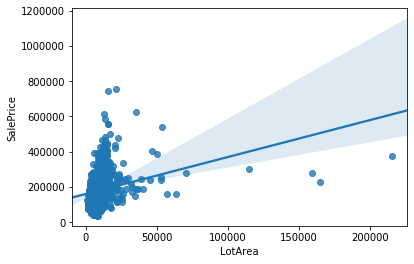

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000


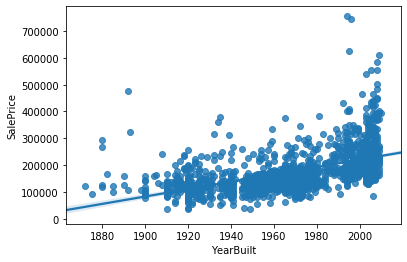

           YearBuilt  SalePrice
YearBuilt   1.000000   0.522897
SalePrice   0.522897   1.000000


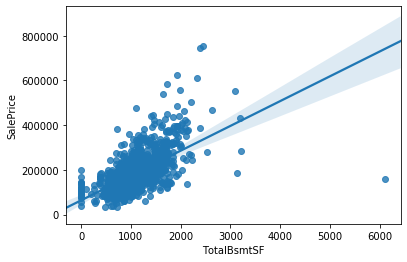

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.613581
SalePrice       0.613581   1.000000


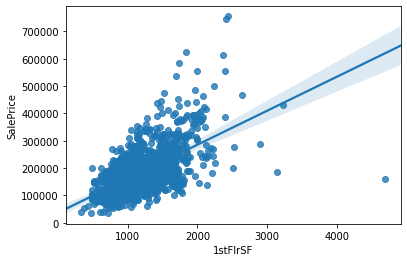

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.605852
SalePrice  0.605852   1.000000


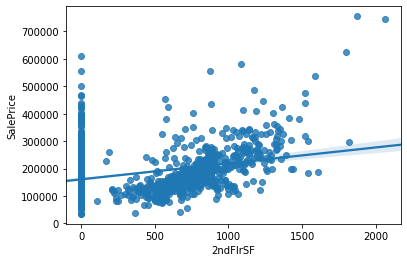

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.319334
SalePrice  0.319334   1.000000


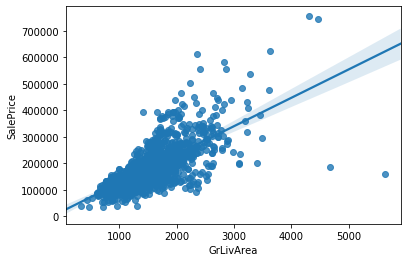

           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePrice   0.708624   1.000000


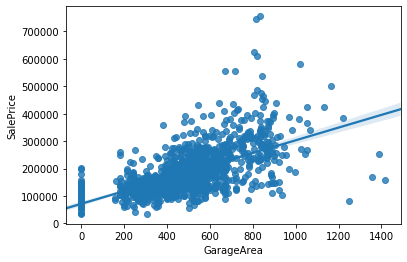

            GarageArea  SalePrice
GarageArea    1.000000   0.623431
SalePrice     0.623431   1.000000


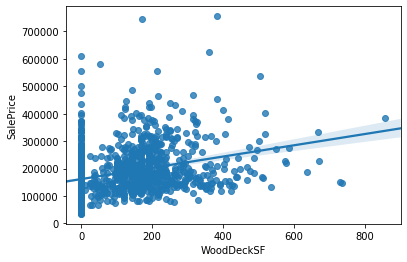

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.324413
SalePrice     0.324413   1.000000


In [40]:
plt.close()
sns.regplot(x="LotArea", y="SalePrice", data=df)
plt.show()
print(df[["LotArea", "SalePrice"]].corr())

plt.close()
sns.regplot(x="YearBuilt", y="SalePrice", data=df)
plt.show()
print(df[["YearBuilt", "SalePrice"]].corr())

#Maybe a polynomial regression (degree at least higher than 2)

plt.close()
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.show()
print(df[["TotalBsmtSF", "SalePrice"]].corr())


plt.close()
sns.regplot(x="1stFlrSF", y="SalePrice", data=df)
plt.show()
print(df[["1stFlrSF", "SalePrice"]].corr())

#The distribution is not homoscedastic

plt.close()
sns.regplot(x="2ndFlrSF", y="SalePrice", data=df)
plt.show()
print(df[["2ndFlrSF", "SalePrice"]].corr())
#Maybe we should split the dbb in two categories : with and without a second floor

plt.close()
sns.regplot(x="GrLivArea", y="SalePrice", data=df)
plt.show()
print(df[["GrLivArea", "SalePrice"]].corr())
#The distribution is not homoscedastic

plt.close()
sns.regplot(x="GarageArea", y="SalePrice", data=df)
plt.show()
print(df[["GarageArea", "SalePrice"]].corr())

plt.close()
sns.regplot(x="WoodDeckSF", y="SalePrice", data=df)
plt.show()
print(df[["WoodDeckSF", "SalePrice"]].corr())
#faintly correlated

### Normalisation des variables quantitatives

In [41]:
DictIntFormat={}
for column in df.columns:
    if str(df[column].dtypes) == "int32" or str(df[column].dtypes) == "int64":
        DictIntFormat[column]=df[column].max()
        df[column]=df[column]/df[column].max()

### Traitement des dummy variables

In [42]:
def get_dummyvariable(column):
    dummy_variable = pd.get_dummies(df[column])

    list_name = list(dummy_variable.columns)
    dict_name = {}
    for name in list_name:
        dict_name[name] = "{0}_{1}".format(column,name)

    dummy_variable.rename(columns=dict_name, inplace=True)

    return dummy_variable

In [43]:
dummy_MSZoning = get_dummyvariable("MSZoning")
df = pd.concat([df, dummy_MSZoning], axis=1)
df.drop("MSZoning", axis = 1, inplace=True)

dummy_LotShape = get_dummyvariable("LotShape")
df = pd.concat([df, dummy_LotShape], axis=1)
df.drop("LotShape", axis = 1, inplace=True)

dummy_Neighborhood = get_dummyvariable("Neighborhood")
df = pd.concat([df, dummy_Neighborhood], axis=1)
df.drop("Neighborhood", axis = 1, inplace=True)

dummy_Foundation = get_dummyvariable("Foundation")
df = pd.concat([df, dummy_Foundation], axis=1)
df.drop("Foundation", axis = 1, inplace=True)

dummy_BsmtQual = get_dummyvariable("BsmtQual")
df = pd.concat([df, dummy_BsmtQual], axis=1)
df.drop("BsmtQual", axis = 1, inplace=True)

dummy_HeatingQC = get_dummyvariable("HeatingQC")
df = pd.concat([df, dummy_HeatingQC], axis=1)
df.drop("HeatingQC", axis = 1, inplace=True)

dummy_KitchenQual = get_dummyvariable("KitchenQual")
df = pd.concat([df, dummy_KitchenQual], axis=1)
df.drop("KitchenQual", axis = 1, inplace=True)


In [44]:
df["CentralAir"] = df["CentralAir"].map(lambda x: dict(Y=1, N=0)[x], df.CentralAir.values.tolist())

df["Fireplaces"] = df["Fireplaces"].map(lambda x: dict([(1.0,1), (0.0,0)])[x], df.Fireplaces.values.tolist())

In [45]:
df

,LotArea,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,...,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,HeatingQC_Ex,HeatingQC_other,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
1,0.039258,0.996517,0.140098,1,0.182438,0.413559,0.303084,0.666667,0.375,0.571429,...,0,0,1,0,1,0,0,0,1,0
2,0.044600,0.983085,0.206547,1,0.268968,0.000000,0.223680,0.666667,0.375,0.428571,...,0,0,1,0,1,0,0,0,0,1
3,0.052266,0.995522,0.150573,1,0.196078,0.419370,0.316554,0.666667,0.375,0.428571,...,0,0,1,0,1,0,0,0,1,0
4,0.044368,0.952736,0.123732,1,0.204817,0.366102,0.304325,0.333333,0.375,0.500000,...,0,0,0,1,0,1,0,0,1,0
5,0.066250,0.995025,0.187398,1,0.244032,0.509927,0.389578,0.666667,0.500,0.642857,...,0,0,1,0,1,0,0,0,1,0
6,0.065576,0.991542,0.130278,1,0.169650,0.274092,0.241404,0.333333,0.125,0.357143,...,0,0,1,0,1,0,0,0,0,1
7,0.046849,0.997015,0.275941,1,0.361040,0.000000,0.300248,0.666667,0.375,0.500000,...,1,0,0,0,1,0,0,0,1,0
8,0.048233,0.981592,0.181178,1,0.235934,0.476029,0.370436,0.666667,0.375,0.500000,...,0,0,1,0,1,0,0,0,0,1
9,0.028433,0.960697,0.155810,1,0.217818,0.364165,0.314428,0.666667,0.250,0.571429,...,0,0,0,1,0,1,0,0,0,1
10,0.034472,0.964677,0.162193,1,0.229540,0.000000,0.190890,0.333333,0.250,0.357143,...,0,0,0,1,1,0,0,0,0,1


## Implémentation d'un modèle de regression linéaire In-Sample

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## Régression linéaire simple

In [47]:
lm = LinearRegression()

X = df[['YearBuilt']]
Y = df['SalePrice']

lm.fit(X,Y)

print(lm.intercept_)   #Intercept
print(lm.coef_)        #Slop

print('The R-square is: ', lm.score(X, Y))

-3.351401649976632
[3.66159029]
The R-square is:  0.27342162073249165


On voit que 28,7% de la variation du prix est expliqué par ce modèle de regression linéaire simple de SalePrice sur YearBuilt

In [48]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['SalePrice'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.008038903958117476


### Regression linéaire multiple

In [49]:
lm2 = LinearRegression()

Z = df[['YearBuilt', 'FullBath', 'BedroomAbvGr']]
Y = df['SalePrice']

lm2.fit(Z,Y)

print(lm2.intercept_)
print(lm2.coef_)

Y_hat2 = lm2.predict(Z)

print('The R-square is: ', lm2.score(Z, df['SalePrice']))

print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['SalePrice'], Y_hat2))

-2.3034047361175456
[2.45715793 0.21534511 0.05828294]
The R-square is:  0.4036993492662171
The mean square error of price and predicted value using multifit is:  0.006597503859452096


### Visualisation de la performance du modèle

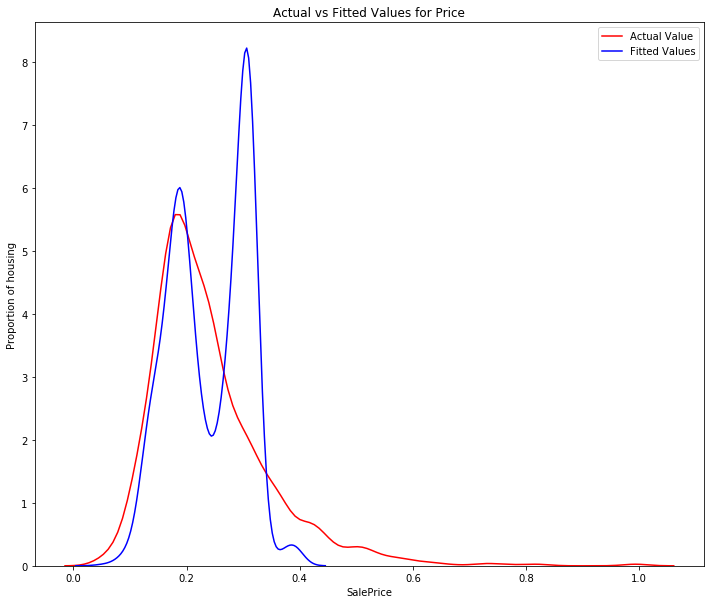

In [50]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('Proportion of housing')

plt.show()
plt.close()

La prédiction n'est pas très efficace

### Regression avec toutes la variable

In [51]:
lm3 = LinearRegression()

List_features = list(df.columns)
List_features.remove("SalePrice")

Z3 = df[List_features]
Y = df['SalePrice']

lm3.fit(Z3,Y)

print(lm3.intercept_)
print(lm3.coef_)

Y_hat3 = lm3.predict(Z3)

print('The R-square is: ', lm3.score(Z3, df['SalePrice']))

print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['SalePrice'], Y_hat3))

847545997856.4764
[ 1.50098030e-01  3.62768966e-01  1.24951424e-01  1.76447555e-02
  1.63826259e-01  7.31463061e-02  1.51441287e-01  1.33233921e-02
 -5.25794769e-02  4.69813575e-02  9.78829291e-03  5.59456712e-02
  2.70619133e-03  3.11375104e-02 -2.29571743e-02 -2.10328797e+11
 -2.10328797e+11 -2.10328797e+11 -2.10328797e+11 -2.10328797e+11
 -6.84618808e+11 -6.84618808e+11 -1.27956942e+11 -1.27956942e+11
 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11
 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11
 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11
 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11
 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11
 -1.27956942e+11 -1.27956942e+11 -1.27956942e+11  2.90602018e+11
  2.90602018e+11  2.90602018e+11  2.90602018e+11  2.90602018e+11
  2.90602018e+11  6.83734986e-02 -4.40640104e-03  1.08559143e-02
  6.47128020e-03  4.96326495e+11  4.96326495e+11 -6.11569963e+11
 -6.115

## Regression linéaire - Out of sample

In [52]:
List_features = list(df.columns)
List_features.remove("SalePrice")
x_data = df[List_features]

y_data = df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 146
number of training samples: 1314


### Regression linéaire simple

In [53]:
lm4=LinearRegression()
lm4.fit(x_train[['YearBuilt']], y_train)
print("Score on test data : ", lm4.score(x_test[['YearBuilt']], y_test))
print("Score on train data : ", lm4.score(x_train[['YearBuilt']], y_train))

Score on test data :  0.2857069033800925
Score on train data :  0.2716856243784258


### Regression linéaire multiple

In [55]:
lm5=LinearRegression()
lm5.fit(x_train, y_train)
print("Score on test data : ", lm5.score(x_test, y_test))
print("Score on train data : ", lm5.score(x_train, y_train))

Y_hat5_train = lm5.predict(x_train)
Y_hat5_test = lm5.predict(x_test)

Score on test data :  0.8752956027567691
Score on train data :  0.8305510768797972


### Visualisation du modèle

Sur le jeu de données Train :

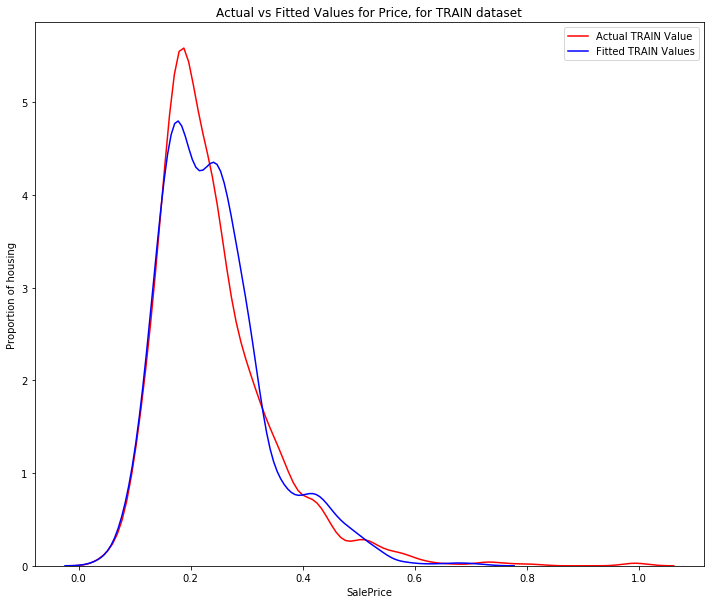

In [56]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual TRAIN Value")
sns.distplot(Y_hat5_train, hist=False, color="b", label="Fitted TRAIN Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price, for TRAIN dataset')
plt.xlabel('SalePrice')
plt.ylabel('Proportion of housing')
plt.show()
plt.close()

Sur le jeu de donnée Test :

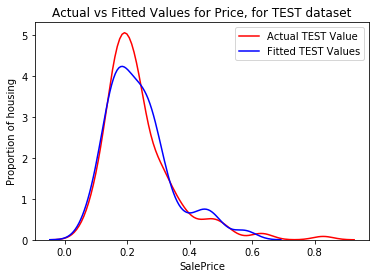

In [57]:
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual TEST Value")
sns.distplot(Y_hat5_test, hist=False, color="b", label="Fitted TEST Values" , ax=ax2)
plt.title('Actual vs Fitted Values for Price, for TEST dataset')
plt.xlabel('SalePrice')
plt.ylabel('Proportion of housing')
plt.show()
plt.close()

### Cross-validation

In [58]:
Rcross = cross_val_score(lm5, x_data, y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

yhat5 = cross_val_predict(lm5,x_data, y_data,cv=4)

The mean of the folds are 0.8089031075987294 and the standard deviation is 0.05371767161481114
